In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import catboost as cb
boston = datasets.load_boston()
X = boston.data
y = boston.target
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=60)

 MSE 9.310881148769973


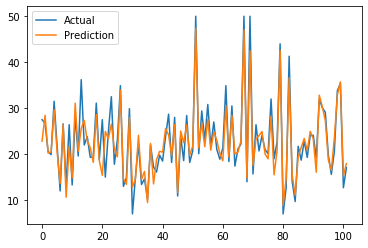

In [10]:
#ngboost
from ngboost import NGBRegressor
ngb = NGBRegressor(natural_gradient=True,verbose=False).fit(X_train, Y_train)
Y_pred_ng = ngb.predict(X_test)
# test Mean Squared Error
ng_mse = mean_squared_error(Y_pred_ng, Y_test)
print(' MSE', ng_mse)
plt.plot(Y_test,label='Actual')
plt.plot(Y_pred_ng,label='Prediction')
plt.legend()

In [11]:
import numpy as np
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
def get_stacking(clf, x_train, y_train, x_test, n_folds=10):
    train_num, test_num = x_train.shape[0], x_test.shape[0]
    second_level_train_set = np.zeros((train_num,))
    second_level_test_set = np.zeros((test_num,))
    test_nfolds_sets = np.zeros((test_num, n_folds))
    kf = KFold(n_splits=n_folds)

    for i,(train_index, test_index) in enumerate(kf.split(x_train)):
        x_tra, y_tra = x_train[train_index], y_train[train_index]
        x_tst, y_tst =  x_train[test_index], y_train[test_index]

        clf.fit(x_tra, y_tra)

        second_level_train_set[test_index] = clf.predict(x_tst)
        test_nfolds_sets[:,i] = clf.predict(x_test)

    second_level_test_set[:] = test_nfolds_sets.mean(axis=1)
    return second_level_train_set, second_level_test_set


In [12]:
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC

rf_model = RandomForestClassifier()
adb_model = AdaBoostClassifier()
gdbc_model = GradientBoostingClassifier()
et_model = ExtraTreesClassifier()
svc_model = SVC()

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
train_x, test_x, train_y, test_y = train_test_split(iris.data, iris.target, test_size=0.2)

train_sets = []
test_sets = []
for clf in [rf_model, adb_model, gdbc_model, et_model, svc_model]:
    train_set, test_set = get_stacking(clf, train_x, train_y, test_x)
    train_sets.append(train_set)
    test_sets.append(test_set)

meta_train = np.concatenate([result_set.reshape(-1,1) for result_set in train_sets], axis=1)
meta_test = np.concatenate([y_test_set.reshape(-1,1) for y_test_set in test_sets], axis=1)


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(meta_train, train_y)
df_predict = dt_model.predict(meta_test)

print(df_predict)

[0 2 2 2 1 1 0 0 0 2 0 0 0 1 1 1 0 0 2 0 1 0 1 1 0 2 2 0 0 0]
